In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
data.rename(columns ={'mean_dist_day': 'dist', 'mean_over_speed_perc':'overspeed'}, inplace=True)

In [ ]:
data.columns

Index(['id', 'dist', 'overspeed'], dtype='object')

In [ ]:
data.isnull().sum()

,0
id,0
dist,0
overspeed,0


In [ ]:
data.dtypes

,0
id,int64
dist,float64
overspeed,int64


In [ ]:
data.drop(columns = ['id'], inplace=True)

<Axes: xlabel='overspeed', ylabel='dist'>

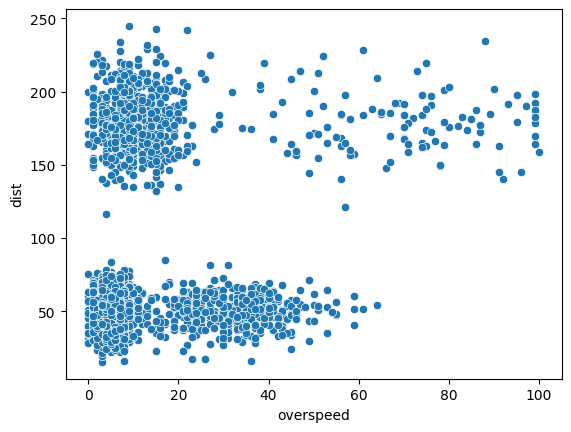

In [ ]:
sns.scatterplot(x=data['overspeed'], y=data['dist'])

In [ ]:
num_cols = ['dist', 'overspeed']

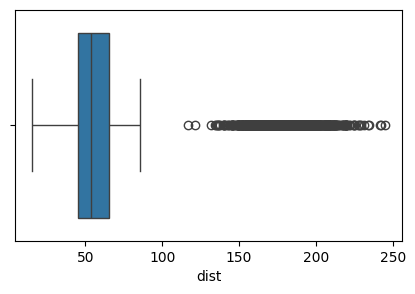

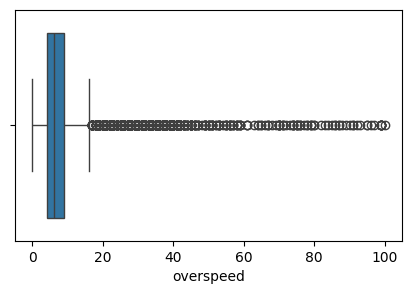

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,3)),
  sns.boxplot(x=data[i])

In [ ]:
Q1 = data['overspeed'].quantile(0.25)
Q3 = data['overspeed'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data[(data['overspeed'] >= lower) & (data['overspeed'] <= upper)]

In [ ]:
Q1 = data['dist'].quantile(0.25)
Q3 = data['dist'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data3 = data[(data['dist'] >= lower) & (data['dist'] <= upper)]

In [ ]:
data.head()

,dist,overspeed
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [ ]:
x = data


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [ ]:
from sklearn.cluster import KMeans

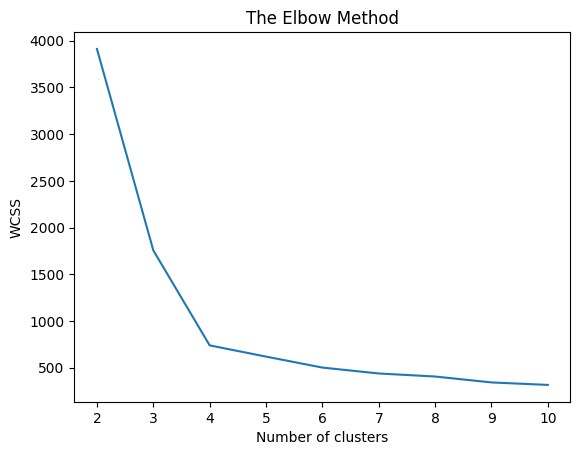

In [ ]:
WCSS = []

for k in range(2,11):

    model = KMeans(n_clusters = k,random_state=10)
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
model1 = KMeans(n_clusters = 4, random_state = 10)
model1.fit(x)

KMeans(n_clusters=4, random_state=10)

In [ ]:
model1.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

<Axes: xlabel='dist', ylabel='overspeed'>

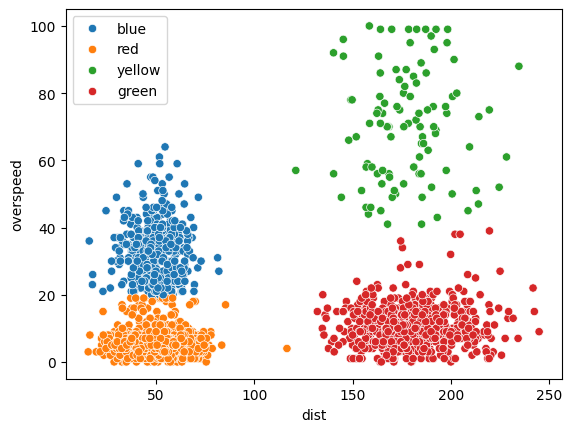

In [ ]:
color = np.array(['red','green','yellow','blue'])
sns.scatterplot(x= data.dist,y = data.overspeed,hue=color[model1.labels_])

In [ ]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,model1.labels_)
score

np.float64(0.7848971045957268)